In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import statistics
import math
import datetime
import operator
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score as acc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm

C:\Users\Alienware\Anaconda3\envs\EVM\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
def reader(file):
    csv = open(file, 'r',encoding="utf8", errors='ignore')
    data =  pd.read_csv(csv)
    return data

In [3]:
Training = reader('train_transaction.csv')
Training.shape

(590540, 394)

In [4]:
Training.isna().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
card1                  0
card2               8933
card3               1565
card4               1577
card5               4259
card6               1571
addr1              65706
addr2              65706
dist1             352271
dist2             552913
P_emaildomain      94456
R_emaildomain     453249
C1                     0
C2                     0
C3                     0
C4                     0
C5                     0
C6                     0
C7                     0
C8                     0
C9                     0
C10                    0
C11                    0
C12                    0
C13                    0
                   ...  
V310                  12
V311                  12
V312                  12
V313                1269
V314                1269
V315                1269
V316                  12
V317                  12
V318                  12


In [5]:
dic = dict(Training.isna().sum())
[x for x in dic.keys() if dic[x] > 500000]

['dist2',
 'D6',
 'D7',
 'D8',
 'D9',
 'D12',
 'D13',
 'D14',
 'V138',
 'V139',
 'V140',
 'V141',
 'V142',
 'V143',
 'V144',
 'V145',
 'V146',
 'V147',
 'V148',
 'V149',
 'V150',
 'V151',
 'V152',
 'V153',
 'V154',
 'V155',
 'V156',
 'V157',
 'V158',
 'V159',
 'V160',
 'V161',
 'V162',
 'V163',
 'V164',
 'V165',
 'V166',
 'V322',
 'V323',
 'V324',
 'V325',
 'V326',
 'V327',
 'V328',
 'V329',
 'V330',
 'V331',
 'V332',
 'V333',
 'V334',
 'V335',
 'V336',
 'V337',
 'V338',
 'V339']

Based on above result, we can see that V322 - V339 and dist2 contains over 85% missing value. After consideration, we choose to firstly drop them.

In [6]:
Training2 = Training.iloc[:,0:376]

In [7]:
Training2 = Training2.drop('dist2',axis = 1)

In [8]:
Training2.shape

(590540, 375)

Training2 now is the training set for trsancation, and for the next step, we are going to deal with the missing value

In [9]:
Training_identity = reader('train_identity.csv')
Training_identity

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS
5,2987017,-5.0,61141.0,3.0,0.0,3.0,0.0,NaN,NaN,3.0,...,chrome 62.0,24.0,1366x768,match_status:2,T,F,T,T,desktop,Windows
6,2987022,-15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2987038,0.0,31964.0,0.0,0.0,0.0,-10.0,NaN,NaN,0.0,...,chrome 62.0,32.0,1920x1080,match_status:2,T,F,T,T,mobile,NaN
8,2987040,-10.0,116098.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
9,2987048,-5.0,257037.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows


In [10]:
Training_identity.shape

(144233, 41)

In [11]:
Training_identity.isna().sum()

TransactionID         0
id_01                 0
id_02              3361
id_03             77909
id_04             77909
id_05              7368
id_06              7368
id_07            139078
id_08            139078
id_09             69307
id_10             69307
id_11              3255
id_12                 0
id_13             16913
id_14             64189
id_15              3248
id_16             14893
id_17              4864
id_18             99120
id_19              4915
id_20              4972
id_21            139074
id_22            139064
id_23            139064
id_24            139486
id_25            139101
id_26            139070
id_27            139064
id_28              3255
id_29              3255
id_30             66668
id_31              3951
id_32             66647
id_33             70944
id_34             66428
id_35              3248
id_36              3248
id_37              3248
id_38              3248
DeviceType         3423
DeviceInfo        25567
dtype: int64

based on above result, we can see that id_07,id_08,id_21,id_22,id_23,id_24,id_25,id_26,id_27 contains more than 95% missing value. In this case, we remove them

In [12]:
Training_identity2 = Training_identity.drop(['id_07','id_08','id_21','id_22','id_23','id_24','id_25','id_26','id_27'],axis = 1)

In [13]:
Training_identity2

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,100.000000,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,0.0,0.0,100.000000,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,100.000000,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,0.0,0.0,100.000000,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS
5,2987017,-5.0,61141.0,3.0,0.0,3.0,0.0,3.0,0.0,100.000000,...,chrome 62.0,24.0,1366x768,match_status:2,T,F,T,T,desktop,Windows
6,2987022,-15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2987038,0.0,31964.0,0.0,0.0,0.0,-10.0,0.0,0.0,100.000000,...,chrome 62.0,32.0,1920x1080,match_status:2,T,F,T,T,mobile,NaN
8,2987040,-10.0,116098.0,0.0,0.0,0.0,0.0,0.0,0.0,100.000000,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
9,2987048,-5.0,257037.0,NaN,NaN,0.0,0.0,NaN,NaN,100.000000,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows


above is the training dataset for user identity

In [14]:
Training_complete = pd.merge(Training2,Training_identity2,on = 'TransactionID')

In [15]:
Training_complete.isna().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
card1                  0
card2                902
card3                172
card4                184
card5                956
card6                178
addr1              60447
addr2              60447
dist1             144233
P_emaildomain      13391
R_emaildomain      13150
C1                     0
C2                     0
C3                     0
C4                     0
C5                     0
C6                     0
C7                     0
C8                     0
C9                     0
C10                    0
C11                    0
C12                    0
C13                    0
C14                    0
                   ...  
id_02               3361
id_03              77909
id_04              77909
id_05               7368
id_06               7368
id_09              69307
id_10              69307
id_11               3255
id_12                  0


Trying to merge two data frame together by inner join, however, we can see that the number of data decrease dramatically. Not appropiate

In [16]:
Training_complete_left = pd.merge(Training2,Training_identity2,on = 'TransactionID',how = 'left')

Merge by left join, two many missing value, we need to drop those features which containing misssing value > 500000

In [17]:
dic = dict(Training_complete_left.isna().sum())

In [18]:
Training_complete_left.shape

(590540, 406)

In [19]:
columns_should_be_reomoved = [x for x in dic.keys() if dic[x] > 500000]
columns_should_be_reomoved


['D6',
 'D7',
 'D8',
 'D9',
 'D12',
 'D13',
 'D14',
 'V138',
 'V139',
 'V140',
 'V141',
 'V142',
 'V143',
 'V144',
 'V145',
 'V146',
 'V147',
 'V148',
 'V149',
 'V150',
 'V151',
 'V152',
 'V153',
 'V154',
 'V155',
 'V156',
 'V157',
 'V158',
 'V159',
 'V160',
 'V161',
 'V162',
 'V163',
 'V164',
 'V165',
 'V166',
 'id_03',
 'id_04',
 'id_09',
 'id_10',
 'id_14',
 'id_18',
 'id_30',
 'id_32',
 'id_33',
 'id_34']

In [20]:
Training_complete = Training_complete_left.drop([x for x in dic.keys() if dic[x] > 500000],axis = 1)

In [21]:
Training_complete

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_20,id_28,id_29,id_31,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.500,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.000,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.000,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.000,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,...,144.0,New,NotFound,samsung browser 6.2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
5,2987005,0,86510,49.000,W,5937,555.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2987006,0,86522,159.000,W,12308,360.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2987007,0,86529,422.500,W,12695,490.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2987008,0,86535,15.000,H,2803,100.0,150.0,visa,226.0,...,500.0,New,NotFound,mobile safari 11.0,T,F,F,T,mobile,iOS Device
9,2987009,0,86536,117.000,W,17399,111.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
num_cols = Training_complete._get_numeric_data().columns
cate_cols = list(set(Training_complete.columns) - set(num_cols))
for cols in cate_cols:
    Training_complete[cols] = Training_complete[cols].astype('category').cat.codes
Training_complete.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_20,id_28,id_29,id_31,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,4,13926,NaN,150.0,1,142.0,...,NaN,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,2987001,0,86401,29.0,4,2755,404.0,150.0,2,102.0,...,NaN,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,2987002,0,86469,59.0,4,4663,490.0,150.0,3,166.0,...,NaN,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,2987003,0,86499,50.0,4,18132,567.0,150.0,2,117.0,...,NaN,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,2987004,0,86506,50.0,1,4497,514.0,150.0,2,102.0,...,144.0,1,1,123,1,0,1,1,1,954


In [24]:
Training_complete.to_csv("Training Data.csv")

### Fill the missing value by Mean and Mode(for categorical data)

In [33]:
# Filling the missing value by Mode and Mean
def Avgmiss(df):
    for columns in list(df.columns):
        #if not isinstance(df[columns][0],str):
        if columns in ['dist1','card2'] and columns[0] =='D':
            df[columns].fillna(df[columns].mean(),inplace = True)
        else:
            df[columns].fillna(df[columns].mode()[0],inplace = True)
            
    return df
#res = [Training2,Testing2]
#update = [(lambda x: Avgmiss(x))(x) for x in res]
Training_complete = Avgmiss(Training_complete)

### Feature Selection

In [36]:
start_time = datetime.datetime.now() 
datafinal = Training_complete
key = list(datafinal.columns)[:-1]
dic = {x:True for x in key}
for i in tqdm(range(len(key))):
    mk = statistics.mean(datafinal[key[i]])
    mki_0 = statistics.mean(datafinal[datafinal['isFraud'] == 0][key[i]])
    mki_1 = statistics.mean(datafinal[datafinal['isFraud'] == 1][key[i]])
    sigmabetween = math.pow((mki_0 - mk),2) + math.pow((mki_1 - mk),2)
    counter_0 = sum(np.array(datafinal[datafinal['isFraud'] == 0][key[i]] - mki_0)**2)
    counter_1 = sum(np.array(datafinal[datafinal['isFraud'] == 1][key[i]] - mki_1)**2)
    ni = datafinal.shape[0]
   # for j in tqdm(range(datafinal[datafinal['isFraud'] == 0].shape[0])):
   #     counter_0 += math.pow((datafinal[datafinal['isFraud'] == 0][key[i]].iloc[j] - mki_0),2)
   # for k in tqdm(range(datafinal[datafinal['isFraud'] == 1].shape[0])):    
   #     counter_1 += math.pow((datafinal[datafinal['isFraud'] == 1][key[i]].iloc[k] - mki_1),2)
    sigmain = 1/ni*(counter_0+counter_1)
    if sigmain == 0:
        sigmain = 0.0001
    fc = sigmabetween/sigmain
    dic[key[i]] = fc
dic
end_time = datetime.datetime.now()
interval = (end_time - start_time).total_seconds()
print ('time used:',interval)



  0%|          | 0/359 [00:00<?, ?it/s]

  0%|          | 1/359 [00:03<21:31,  3.61s/it]

  1%|          | 2/359 [00:07<21:59,  3.70s/it]

  1%|          | 3/359 [00:11<22:17,  3.76s/it]

  1%|          | 4/359 [00:15<23:01,  3.89s/it]

  1%|▏         | 5/359 [00:19<23:03,  3.91s/it]

  2%|▏         | 6/359 [00:23<23:19,  3.97s/it]

  2%|▏         | 7/359 [00:27<22:41,  3.87s/it]

  2%|▏         | 8/359 [00:30<21:56,  3.75s/it]

  3%|▎         | 9/359 [00:34<21:33,  3.69s/it]

  3%|▎         | 10/359 [00:37<21:06,  3.63s/it]

  3%|▎         | 11/359 [00:41<20:34,  3.55s/it]

  3%|▎         | 12/359 [00:44<20:44,  3.59s/it]

  4%|▎         | 13/359 [00:48<20:42,  3.59s/it]

  4%|▍         | 14/359 [00:51<20:28,  3.56s/it]

  4%|▍         | 15/359 [00:55<20:16,  3.54s/it]

  4%|▍         | 16/359 [00:59<21:48,  3.81s/it]

  5%|▍         | 17/359 [01:03<21:22,  3.75s/it]

  5%|▌         | 18/359 [01:06<20:53,  3.68s/it]

  5%|▌         | 19/359 [01:10<20:20,  3.59s/it]

  6%|▌         |

time used: 1244.618393


In [37]:
sorted_dic = sorted(dic.items(), key=operator.itemgetter(1),reverse=True)
top20 = []
for i in range(1,21):
    top20.append(sorted_dic[i][0])
top20 

['V257',
 'V246',
 'V244',
 'V242',
 'V201',
 'V200',
 'V45',
 'V189',
 'V86',
 'V87',
 'V258',
 'V188',
 'V44',
 'V228',
 'V170',
 'V52',
 'V171',
 'V199',
 'V51',
 'V230']

In [38]:
datagroup = datafinal[top20+['isFraud']]
datagroup

,V257,V246,V244,V242,V201,V200,V45,V189,V86,V87,...,V188,V44,V228,V170,V52,V171,V199,V51,V230,isFraud
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0


In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    datagroup.values[:,:-1],
    datagroup.values[:,-1:],
    test_size=0.4,
    random_state=42)
y_train = y_train.ravel()
y_test = y_test.ravel()
print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)
clf = LogisticRegression()
sfs1 = sfs(clf,
           k_features=6,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

Training dataset shape: (354324, 20) (354324,)
Testing dataset shape: (236216, 20) (236216,)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   44.3s finished

[2019-11-30 11:36:36] Features: 1/6 -- score: 0.9682098864693595[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:  1.0min finished

[2019-11-30 11:37:37] Features: 2/6 -- score: 0.9685626716832385[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  1.1min finished

[2019-11-30 11:38:44] Features: 3/6 -- score: 0.9687856307114341[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [40]:
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 3, 6, 10, 11, 13]


In [41]:
selectedfeatures = []
for i in range(0,len(feat_cols)):
    selectedfeatures.append(top20[feat_cols[i]])
selectedfeatures = datagroup[selectedfeatures + ['isFraud']]
selectedfeatures

,V257,V242,V45,V258,V188,V228,isFraud
0,1.0,1.0,1.0,1.0,1.0,1.0,0
1,1.0,1.0,1.0,1.0,1.0,1.0,0
2,1.0,1.0,1.0,1.0,1.0,1.0,0
3,1.0,1.0,1.0,1.0,1.0,1.0,0
4,1.0,1.0,1.0,1.0,1.0,1.0,0
5,1.0,1.0,1.0,1.0,1.0,1.0,0
6,1.0,1.0,1.0,1.0,1.0,1.0,0
7,1.0,1.0,1.0,1.0,1.0,1.0,0
8,1.0,1.0,1.0,1.0,1.0,1.0,0
9,1.0,1.0,1.0,1.0,1.0,1.0,0


In [42]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    selectedfeatures.values[:,:-1],
    selectedfeatures.values[:,-1:],
    test_size=0.25,
    random_state=42)
y_train_1 = y_train_1.ravel()
y_test_1 = y_test_1.ravel()
print('Training dataset shape:', X_train_1.shape, y_train_1.shape)
print('Testing dataset shape:', X_test_1.shape, y_test_1.shape)
smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X_train_1, y_train_1)
#ros = RandomOverSampler(random_state=2)
#X_sm, y_sm = ros.fit_resample(X_train_1, y_train_1)
logisticRegr = LogisticRegression()
logisticRegr.fit(X_sm,y_sm)
predictions = logisticRegr.predict(X_test_1)
recall_score(y_test_1, predictions)

Training dataset shape: (442905, 6) (442905,)
Testing dataset shape: (147635, 6) (147635,)


0.37285579641847316

In [43]:
metrics.precision_score(y_test_1,predictions )

0.17770191357470128

In [44]:
f1_score(y_test_1,predictions)

0.24069116573375518

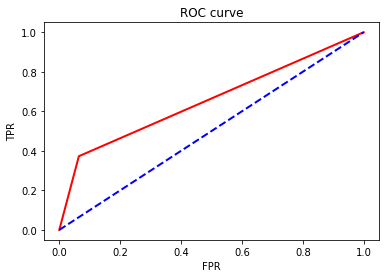

In [45]:
##Computing false and true positive rates
fpr, tpr,_=roc_curve(y_test_1,predictions,drop_intermediate=False)

import matplotlib.pyplot as plt
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()